In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sys
!pip install scipy
from scipy.cluster.hierarchy import dendrogram, linkage
import sklearn.metrics
#!pip install umap-learn
import umap 

In [2]:
print(sys.executable)
print(sys.version)
print(sys.version_info)

C:\Users\Enric\anaconda3\python.exe
3.9.13 (main, Aug 25 2022, 23:51:50) [MSC v.1916 64 bit (AMD64)]
sys.version_info(major=3, minor=9, micro=13, releaselevel='final', serial=0)


In [3]:
#path = "H:\\Dropbox\\Personale\\Ricerca\\Clustering_Project_with_Notre_Dame\\Datasets\\"
path = "C:\\Users\\Enric\\Dropbox\\Personale\\Ricerca\\Clustering_Project_with_Notre_Dame\\Datasets\\"
name = "UnsupervisedDataLamb2.5.npy"

In [4]:
array = np.load(path+name)
print(type(array))

<class 'numpy.ndarray'>


In [5]:
# Create the dataframe
df = pd.DataFrame(np.transpose(array))

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21515 entries, 0 to 21514
Columns: 750 entries, 0 to 749
dtypes: float64(750)
memory usage: 123.1 MB


In [7]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,740,741,742,743,744,745,746,747,748,749
0,0.999999,0.001514,7.909359e-09,1.473802e-10,1.554399e-14,9.421977e-16,8.881774e-16,8.881774e-16,8.881774e-16,8.586895e-16,...,9.991996e-17,9.991996e-17,9.991996e-17,9.991996e-17,9.991996e-17,9.991996e-17,9.991996e-17,9.991996e-17,9.991996e-17,9.991996e-17
1,0.999999,0.001514,2.862505e-05,4.844612e-07,2.596621e-12,1.547580e-14,3.402560e-15,1.607878e-15,1.455078e-15,1.419346e-15,...,9.991996e-17,9.991996e-17,9.991996e-17,9.991996e-17,9.991996e-17,9.991996e-17,9.991996e-17,9.991996e-17,9.991996e-17,9.991996e-17
2,0.999999,0.001514,3.251753e-09,4.722620e-12,4.067704e-12,6.297792e-14,3.852391e-14,1.973441e-15,1.517869e-15,9.487174e-16,...,9.991996e-17,9.991996e-17,9.991996e-17,9.991996e-17,9.991996e-17,9.991996e-17,9.991996e-17,9.991996e-17,9.991996e-17,9.991996e-17
3,0.999999,0.001514,2.862542e-05,4.844670e-07,3.228937e-12,2.597304e-12,5.899384e-14,1.588316e-14,9.029597e-15,1.707734e-15,...,9.991995e-17,9.991995e-17,9.991995e-17,9.991995e-17,9.991995e-17,9.991995e-17,9.991995e-17,9.991995e-17,9.991995e-17,9.991995e-17
4,0.999999,0.001514,2.862542e-05,4.844670e-07,3.228976e-12,2.597270e-12,1.593228e-14,1.544095e-14,9.048210e-15,5.852149e-15,...,9.991996e-17,9.991996e-17,9.991996e-17,9.991996e-17,9.991996e-17,9.991996e-17,9.991996e-17,9.991996e-17,9.991996e-17,9.991996e-17


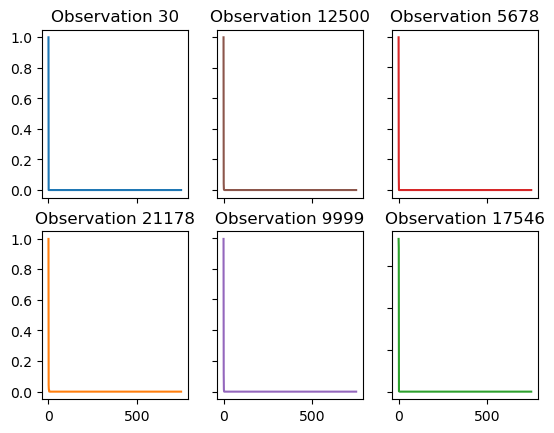

In [8]:
# plotting the points
x = range(0, 750)
y = [30, 12500, 5678, 21178, 9999, 17546]
fig, axs = plt.subplots(2, 3)

axs[0, 0].plot(x, df.iloc[y[0]])
label = 'Observation '+ str(y[0])
axs[0, 0].set_title(label)

axs[0, 1].plot(x, df.iloc[y[1]], 'tab:brown')
label = 'Observation '+ str(y[1])
axs[0, 1].set_title(label)

axs[0, 2].plot(x, df.iloc[y[2]], 'tab:red')
label = 'Observation '+ str(y[2])
axs[0, 2].set_title(label)

axs[1, 0].plot(x, df.iloc[y[3]], 'tab:orange')
label = 'Observation '+ str(y[3])
axs[1, 0].set_title(label)

axs[1, 1].plot(x, df.iloc[y[4]], 'tab:purple')
label = 'Observation '+ str(y[4])
axs[1, 1].set_title(label)

axs[1, 2].plot(x, df.iloc[y[5]], 'tab:green')
label = 'Observation '+ str(y[5])
axs[1, 2].set_title(label)



# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in axs.flat:
     ax.label_outer()
        

# Scale the dataset
Scaling can be defined as a statistical method of rescaling data to adjust values measured on different scales into a common scale. The primary objective of normalization is to fit all the data points between the range of 0 to 1, thereby enabling the data points to become more comparable.

Normalization is a commonly employed technique for scaling data, wherein the minimum value of a feature is transformed into 0 and the maximum value into 1. This technique is used to remove the effect of the scale of measurement from the data and provide a standardized representation. It facilitates the comparison of data points from different sources and improves the performance of various machine learning algorithms.

In [9]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_array = scaler.fit_transform(df)
df = pd.DataFrame( scaled_array, columns = df.columns )

In [10]:
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

# PCA
Project the dataset onto a 2-dimensional space

In [13]:
COMPONENTS = 10

pca = PCA(n_components = COMPONENTS)
x_9d = pca.fit_transform(df)

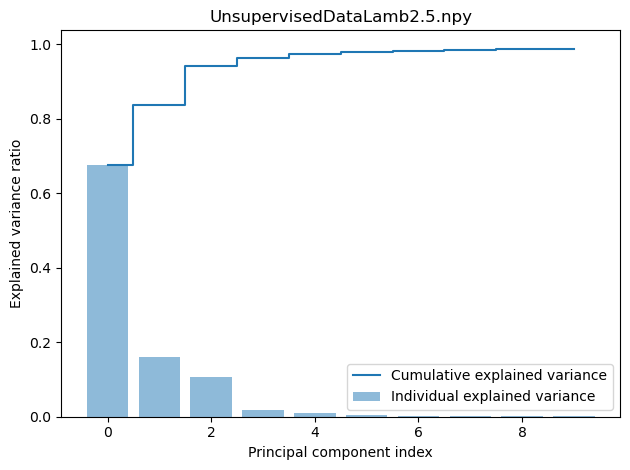

In [14]:
# Determine explained variance using explained_variance_ration_ attribute
#
exp_var_pca = pca.explained_variance_ratio_
#
# Cumulative sum of eigenvalues; This will be used to create step plot
# for visualizing the variance explained by each principal component.
#
cum_sum_eigenvalues = np.cumsum(exp_var_pca)
#
# Create the visualization plot
#
plt.bar(range(0,len(exp_var_pca)), exp_var_pca, alpha=0.5, align='center', label='Individual explained variance')
plt.step(range(0,len(cum_sum_eigenvalues)), cum_sum_eigenvalues, where='mid',label='Cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal component index')
plt.legend(loc='best')
plt.title(name)
plt.tight_layout()
plt.show()

C:\Users\Enric\AppData\Local\Temp\ipykernel_33900\421275878.py:14: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = plt.figure(figsize=(16,10)).gca(projection='3d')


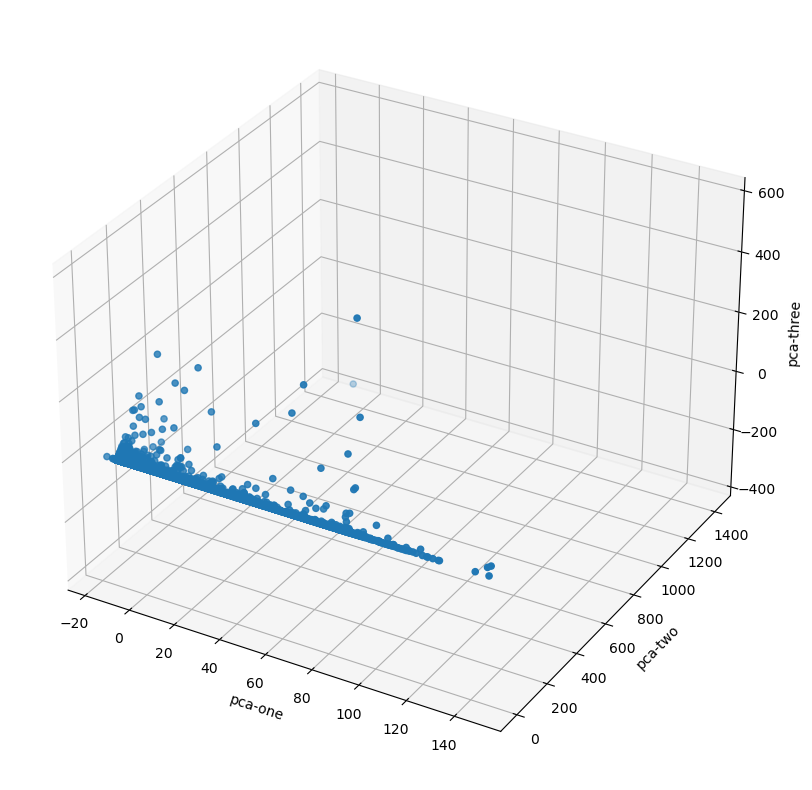

In [18]:


%matplotlib inline
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D


import seaborn as sns
df = pd.DataFrame(x_9d)
df['pca-one'] = x_9d[:,0]
df['pca-two'] = x_9d[:,1] 
df['pca-three'] = x_9d[:,2]
rndperm = np.random.permutation(x_9d.shape[0])


ax = plt.figure(figsize=(16,10)).gca(projection='3d')
ax.scatter(
    xs=df.loc[rndperm,:]["pca-one"], 
    ys=df.loc[rndperm,:]["pca-two"], 
    zs=df.loc[rndperm,:]["pca-three"], 
    #c=df.loc[rndperm,:]["y"], 
    cmap='tab10'
)
ax.set_xlabel('pca-one')
ax.set_ylabel('pca-two')
ax.set_zlabel('pca-three')
plt.show()